In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import os

In [9]:
# === 1. Load CSV file ===
df = pd.read_csv("stats/resampled_stats.csv")  # update filename if needed

In [10]:
# === 2. Compute averages ===
avg_vertices = df["num_vertices"].mean()
avg_faces = df["num_faces"].mean()
print(f"Average vertices: {avg_vertices:.2f}")
print(f"Average faces: {avg_faces:.2f}")


Average vertices: 7272.04
Average faces: 15173.38


In [11]:
# === 3. Detect outliers ===
std_vertices = df["num_vertices"].std()
std_faces = df["num_faces"].std()

outliers = df[
    (np.abs(df["num_vertices"] - avg_vertices) > 2*std_vertices) |
    (np.abs(df["num_faces"] - avg_faces) > 2*std_faces)
]
print("Outliers:")
print(outliers)

Outliers:
                                                   file              class  \
20    data/ShapeDatabase_resampled/TruckNonContainer...  TruckNonContainer   
21    data/ShapeDatabase_resampled/TruckNonContainer...  TruckNonContainer   
26    data/ShapeDatabase_resampled/TruckNonContainer...  TruckNonContainer   
29    data/ShapeDatabase_resampled/TruckNonContainer...  TruckNonContainer   
33    data/ShapeDatabase_resampled/TruckNonContainer...  TruckNonContainer   
...                                                 ...                ...   
2246  data/ShapeDatabase_resampled/Bookset/D01183_35...            Bookset   
2439  data/ShapeDatabase_resampled/Skyscraper/D00058...         Skyscraper   
2464    data/ShapeDatabase_resampled/Bed/m950_23704.obj                Bed   
2474    data/ShapeDatabase_resampled/Bed/m949_18397.obj                Bed   
2481    data/ShapeDatabase_resampled/Bed/m947_18092.obj                Bed   

      num_vertices  num_faces      face_types  \
20  

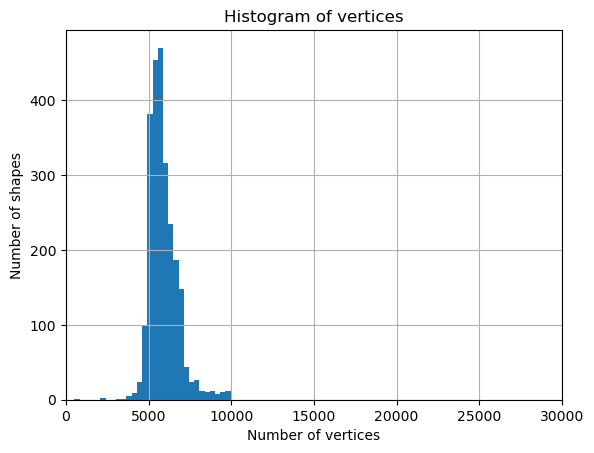

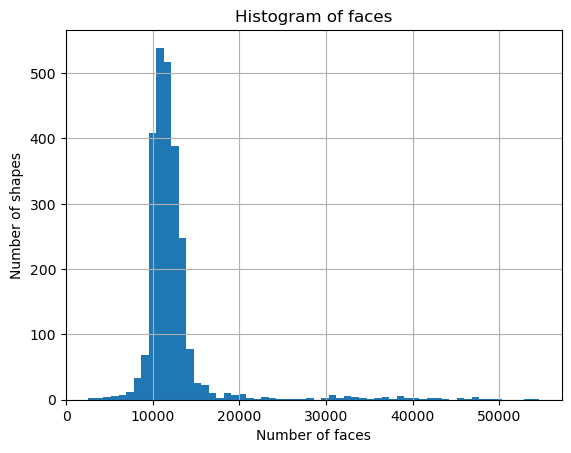

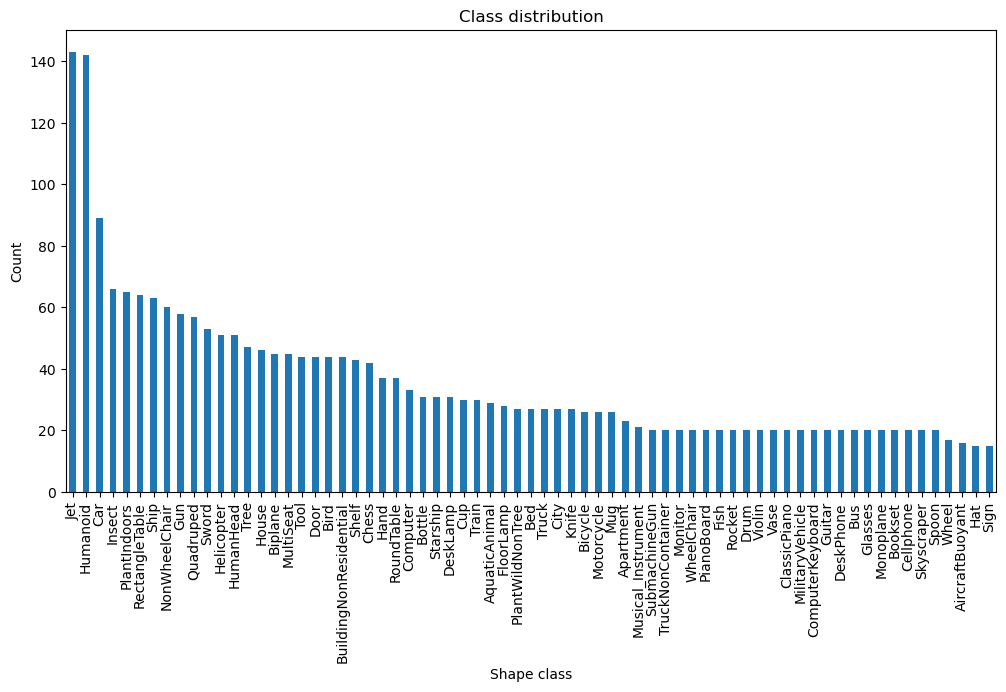

In [21]:
# === 4. Plot histograms ===
plt.figure()
df["num_vertices"].hist(bins=30)
plt.xlabel("Number of vertices")
plt.ylabel("Number of shapes")
plt.title("Histogram of vertices")
plt.xlim(0, 30_000)  # sets x-axis from 0 to 100
plt.savefig("stats/histovertices.png")
plt.show()

plt.figure()
df["num_faces"].hist(bins=60)
plt.xlabel("Number of faces")
plt.ylabel("Number of shapes")
plt.title("Histogram of faces")
# plt.xlim(0, 30_000)  # sets x-axis from 0 to 100
plt.savefig("stats/histofaces.png")
plt.show()

plt.figure(figsize=(12,6))
df["class"].value_counts().plot(kind="bar")
plt.xlabel("Shape class")
plt.ylabel("Count")
plt.title("Class distribution")
plt.show()

In [6]:
# === 5. Average shape + outliers visualization ===
# Find the shape closest to the average
df["dist_to_avg"] = np.sqrt(
    (df["num_vertices"] - avg_vertices)**2 +
    (df["num_faces"] - avg_faces)**2
)
avg_shape_row = df.loc[df["dist_to_avg"].idxmin()]
avg_shape_path = avg_shape_row["file"]  # assuming "path" column in CSV

# Load and visualize with Open3D
mesh_avg = o3d.io.read_triangle_mesh(avg_shape_path)
mesh_avg.compute_vertex_normals()
print("Showing average shape...")
o3d.visualization.draw_geometries([mesh_avg])

# Outlier with fewest vertices
min_shape = df.loc[df["num_vertices"].idxmin()]

# Outlier with most vertices
max_shape = df.loc[df["num_vertices"].idxmax()]

for shape in [min_shape, max_shape]:
    mesh_out = o3d.io.read_triangle_mesh(shape["file"])
    mesh_out.compute_vertex_normals()
    print(f"Showing outlier: {shape['file']}")
    o3d.visualization.draw_geometries([mesh_out])



[Open3D WARNING] Unable to load file data/ShapeDatabase_resampled/Sword/D00071_7223.obj with ASSIMP: Unable to open file "data/ShapeDatabase_resampled/Sword/D00071_7223.obj".
Showing average shape...
You are using a GLFW raw input patch. This is not the official GLFW library.
[Open3D WARNING] GLFW Error: Wayland: The platform does not support setting the window position
[Open3D WARNING] Failed to initialize GLEW.
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
Showing outlier: data/ShapeDatabase_resampled/Spoon/D00683.obj
You are using a GLFW raw input patch. This is not the official GLFW library.
[Open3D WARNING] GLFW Error: Wayland: The platform does not support setting the window position
[Open3D WARNING] Failed to initialize GLEW.
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
[Open3D WARNING] Unable to load file data/ShapeDatabase_resampled/Bookset/D01096_65699.obj with ASSIMP: Unable to open file "data/ShapeDatabase_resampled/Bookset/D01096_6569


(python:42294): Gtk-WARNING **: 18:16:26.770: gtk_disable_setlocale() must be called before gtk_init()

(python:42294): Gtk-WARNING **: 18:16:26.840: gtk_disable_setlocale() must be called before gtk_init()
